<a href="https://colab.research.google.com/github/anu-mohan/Ds_pythoncode/blob/main/Decission_Tree__Company_(Anisha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Company Sales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
company = pd.read_csv("/content/Company_Data.csv")
company.head()

Sales  CompPrice  Income  Advertising  ...  Age  Education Urban   US
0   9.50        138      73           11  ...   42         17   Yes  Yes
1  11.22        111      48           16  ...   65         10   Yes  Yes
2  10.06        113      35           10  ...   59         12   Yes  Yes
3   7.40        117     100            4  ...   55         14   Yes  Yes
4   4.15        141      64            3  ...   38         13   Yes   No

[5 rows x 11 columns]

In [5]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company['Sales_Range'] = pd.cut(company.Sales,bins=[0,3,6,10,14,20],
                                     labels=['Poor','Below_Avg','Avg','Above_Avg','Outstanding'],include_lowest=True)

In [7]:
label_encoder = preprocessing.LabelEncoder()
company_data = company[['ShelveLoc', 'Urban','US']].apply(label_encoder.fit_transform)
company_data = company_data.rename(columns={'ShelveLoc':'ShelveLoc_num', 'Urban':'Urban_num','US':'US_num'})

In [8]:
company_data.head()

ShelveLoc_num  Urban_num  US_num
0              0          1       1
1              1          1       1
2              2          1       1
3              2          1       1
4              0          1       0

In [9]:
company_data = pd.concat([company,company_data], axis=1, sort=False)
company_data.head()

Sales  CompPrice  Income  ...  ShelveLoc_num  Urban_num  US_num
0   9.50        138      73  ...              0          1       1
1  11.22        111      48  ...              1          1       1
2  10.06        113      35  ...              2          1       1
3   7.40        117     100  ...              2          1       1
4   4.15        141      64  ...              0          1       0

[5 rows x 15 columns]

In [10]:
company_data =company_data.drop(columns={'Sales','ShelveLoc','Urban','US'},axis=1)

In [11]:
company_data = company_data[["CompPrice","Income","Advertising","Population","Price","Age",
                             "Education","ShelveLoc_num","Urban_num","US_num","Sales_Range"]]

In [12]:
company_data.head()

CompPrice  Income  Advertising  ...  Urban_num  US_num  Sales_Range
0        138      73           11  ...          1       1          Avg
1        111      48           16  ...          1       1    Above_Avg
2        113      35           10  ...          1       1    Above_Avg
3        117     100            4  ...          1       1          Avg
4        141      64            3  ...          1       0    Below_Avg

[5 rows x 11 columns]

In [13]:
colnames=list(company_data.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_num',
 'Urban_num',
 'US_num',
 'Sales_Range']

In [14]:
company_data['Sales_Range'].unique()

['Avg', 'Above_Avg', 'Below_Avg', 'Outstanding', 'Poor']
Categories (5, object): ['Poor' < 'Below_Avg' < 'Avg' < 'Above_Avg' < 'Outstanding']

In [15]:
company_data.Sales_Range.value_counts()

Avg            192
Below_Avg      113
Above_Avg       74
Poor            17
Outstanding      4
Name: Sales_Range, dtype: int64

In [16]:
company_data.isnull().sum()

CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
Age              0
Education        0
ShelveLoc_num    0
Urban_num        0
US_num           0
Sales_Range      0
dtype: int64

Visulazing the distribution of the data for every feature

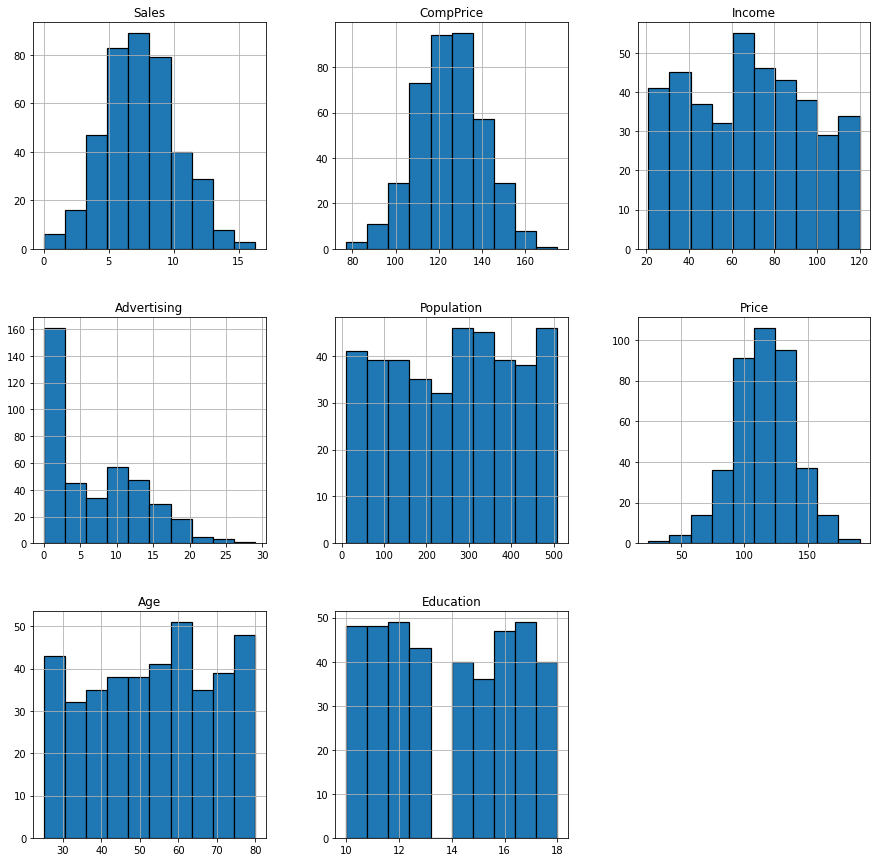

In [17]:
company.hist(edgecolor='black', linewidth=1.2, figsize=(15, 15));

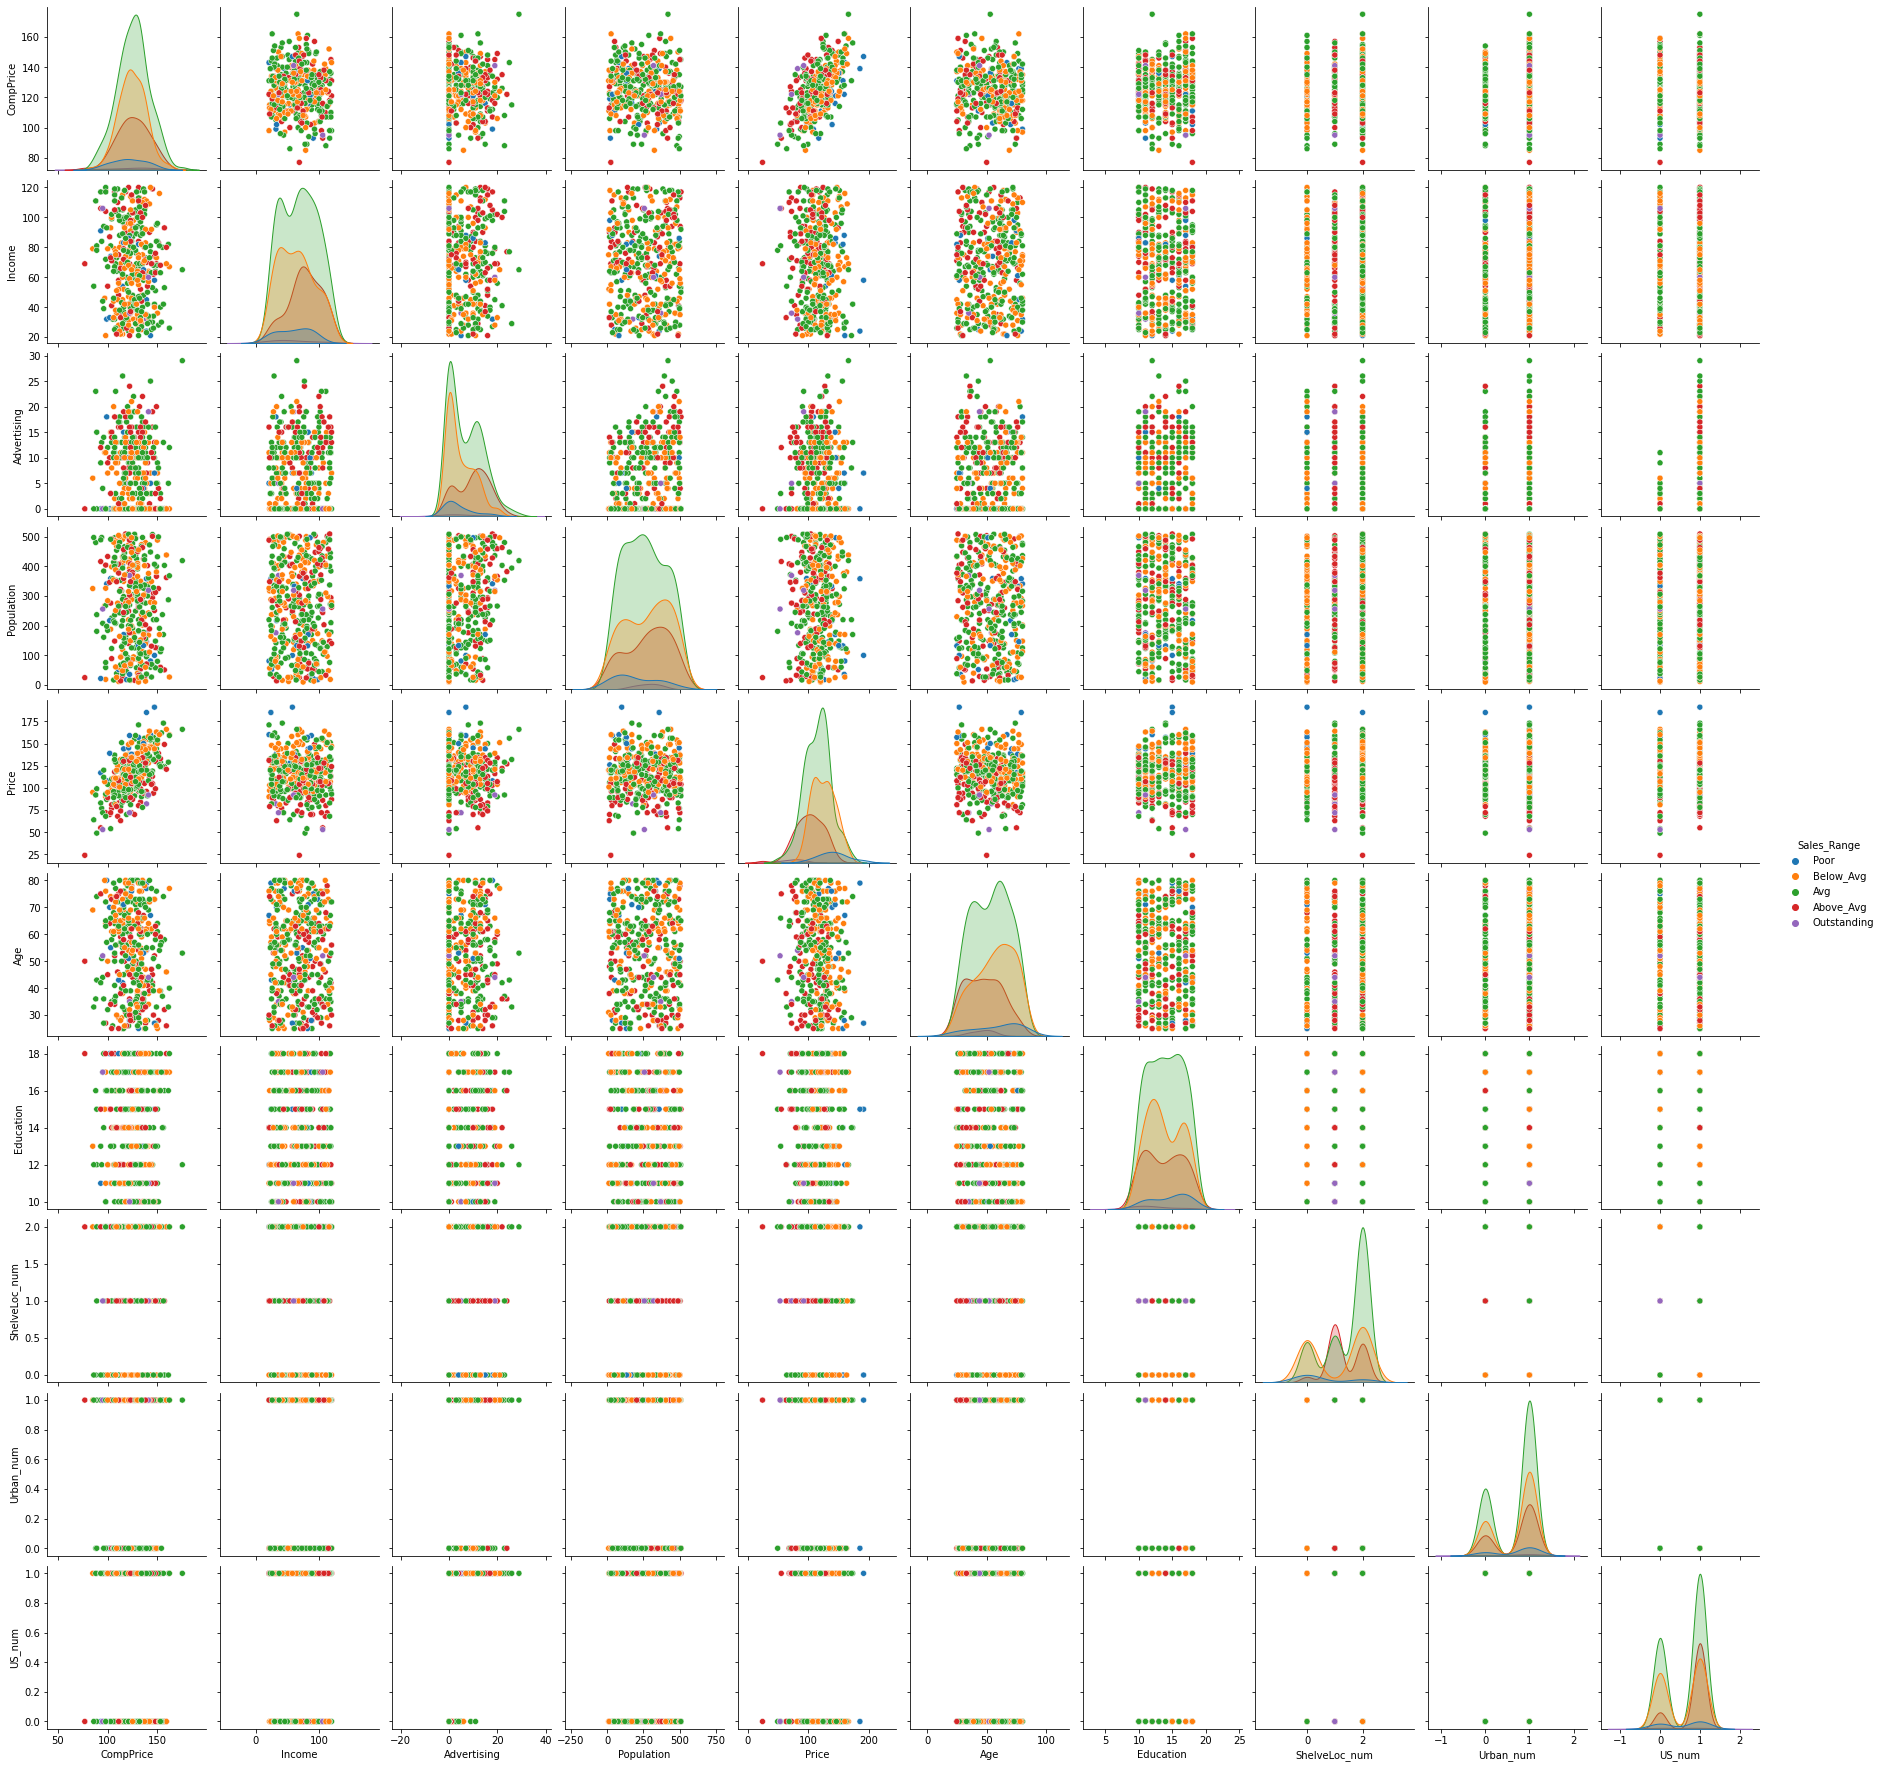

In [18]:
import seaborn as sns
sns.pairplot(company_data,hue='Sales_Range')

In [19]:
x=company_data.iloc[:,0:10]
y=company_data['Sales_Range']

In [20]:
x

CompPrice  Income  Advertising  ...  ShelveLoc_num  Urban_num  US_num
0          138      73           11  ...              0          1       1
1          111      48           16  ...              1          1       1
2          113      35           10  ...              2          1       1
3          117     100            4  ...              2          1       1
4          141      64            3  ...              0          1       0
..         ...     ...          ...  ...            ...        ...     ...
395        138     108           17  ...              1          1       1
396        139      23            3  ...              2          0       1
397        162      26           12  ...              2          1       1
398        100      79            7  ...              0          1       1
399        134      37            0  ...              1          1       1

[400 rows x 10 columns]

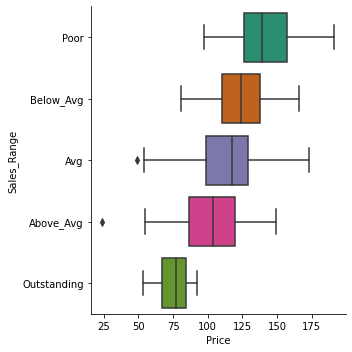

In [21]:
sns.catplot(x='Price',y='Sales_Range',data=company,kind='box',palette='Dark2')

Here also after seeing different boxplot we found this information that which boxplot comes under the sales range of the company.

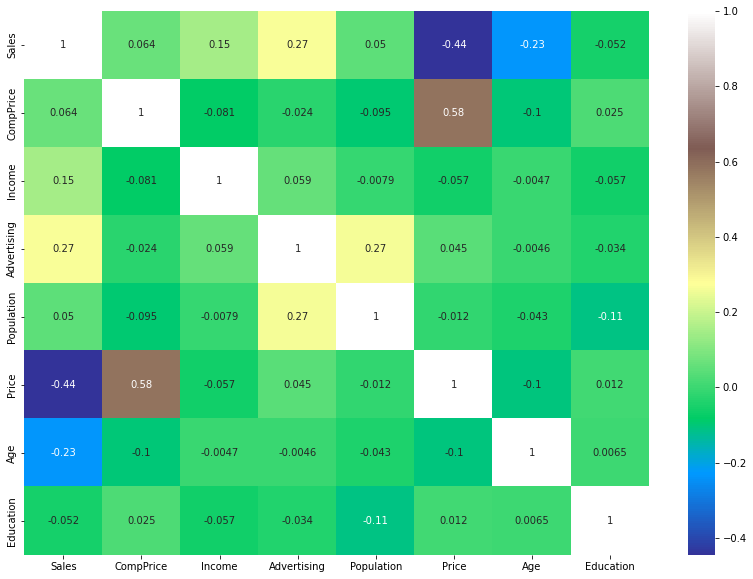

In [22]:
plt.figure(figsize=(14,10))
sns.heatmap(company.corr(),annot=True,cmap='terrain')

Splitting data into training and testing data set

In [23]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [24]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

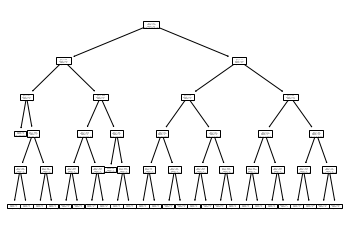

In [25]:
tree.plot_tree(model);

In [26]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_num',
 'Urban_num',
 'US_num']
cn=['Poor','Below_Avg','Avg','Above_Avg','Outstanding']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2.5,2.5), dpi=5000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [27]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts() 

Avg            40
Below_Avg      18
Above_Avg      17
Outstanding     4
Poor            1
dtype: int64

In [28]:
preds

array(['Above_Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg', 'Above_Avg',
       'Avg', 'Avg', 'Outstanding', 'Avg', 'Avg', 'Avg', 'Avg',
       'Above_Avg', 'Below_Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg',
       'Above_Avg', 'Above_Avg', 'Avg', 'Above_Avg', 'Avg', 'Below_Avg',
       'Above_Avg', 'Below_Avg', 'Above_Avg', 'Above_Avg', 'Outstanding',
       'Avg', 'Outstanding', 'Avg', 'Avg', 'Avg', 'Above_Avg',
       'Below_Avg', 'Below_Avg', 'Avg', 'Avg', 'Below_Avg', 'Below_Avg',
       'Avg', 'Avg', 'Above_Avg', 'Below_Avg', 'Avg', 'Avg', 'Below_Avg',
       'Below_Avg', 'Avg', 'Above_Avg', 'Avg', 'Poor', 'Outstanding',
       'Avg', 'Avg', 'Avg', 'Below_Avg', 'Below_Avg', 'Avg', 'Above_Avg',
       'Avg', 'Below_Avg', 'Avg', 'Above_Avg', 'Below_Avg', 'Avg',
       'Above_Avg', 'Above_Avg', 'Above_Avg', 'Avg', 'Avg', 'Avg', 'Avg',
       'Below_Avg', 'Avg', 'Avg', 'Below_Avg'], dtype=object)

In [29]:
pd.crosstab(y_test,preds)

col_0        Above_Avg  Avg  Below_Avg  Outstanding  Poor
Sales_Range                                              
Poor                 0    0          4            0     0
Below_Avg            0   12         10            0     1
Avg                 11   24          4            0     0
Above_Avg            6    4          0            4     0

In [30]:
np.mean(preds==y_test)

0.5

Bagging Technique

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix

In [32]:
seed = 7
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)

In [33]:
model.fit(x_train, y_train);

In [34]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 8,  5,  0,  1,  0],
       [ 9, 26,  4,  0,  0],
       [ 0, 10, 11,  0,  2],
       [ 0,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  0]])

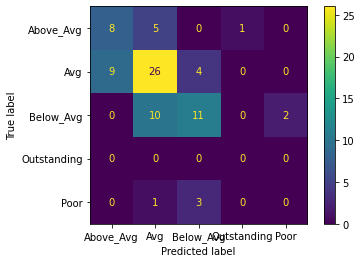

In [35]:
plot_confusion_matrix(model,x_test,y_test)

Using Bagging Technique we ontained 65% accuracy

#Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [37]:
num_trees = 400
max_features = 4
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [38]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
accuracy_score(y_test,model.predict(x_test))

0.6125

In [40]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 8,  6,  0,  0],
       [ 6, 31,  2,  0],
       [ 0, 13, 10,  0],
       [ 0,  1,  3,  0]])

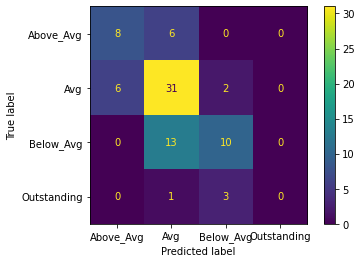

In [41]:
plot_confusion_matrix(model,x_test,y_test)

Using Random Forest we obtained 60% accuracy

#Ada Boost

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [43]:
num_trees = 30
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)

In [44]:
model.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=30, random_state=None)

In [45]:
accuracy_score(y_test,model.predict(x_test))

0.5

In [46]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 5,  9,  0,  0],
       [ 7, 29,  3,  0],
       [ 0, 17,  6,  0],
       [ 0,  3,  1,  0]])

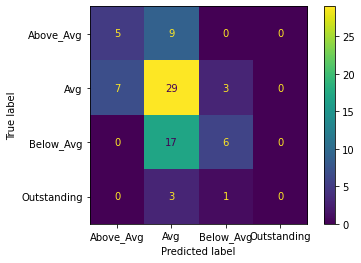

In [47]:
plot_confusion_matrix(model,x_test,y_test)

Using AdaBoost we obtained 50% accuracy

#XG Boost

In [48]:
from xgboost import XGBClassifier

In [49]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [50]:
y_pred = model.predict(x_test)
predictions = [value for value in y_pred]

In [51]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.50%


In [52]:
predictions

['Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Above_Avg',
 'Avg',
 'Avg',
 'Above_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Above_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Below_Avg',
 'Avg',
 'Above_Avg',
 'Avg',
 'Above_Avg',
 'Below_Avg',
 'Avg',
 'Above_Avg',
 'Below_Avg',
 'Above_Avg',
 'Above_Avg',
 'Outstanding',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Above_Avg',
 'Avg',
 'Poor',
 'Above_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Below_Avg',
 'Below_Avg',
 'Above_Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Avg',
 'Above_Avg',
 'Avg',
 'Above_Avg',
 'Avg',
 'Avg',
 'Avg',
 'Avg',
 'Below_Avg',
 'Below_Avg',
 'Below_Avg',
 'Poor']

In [53]:
company.to_csv('auto(b).csv')

Result: Decision trees with different parameters have been tried out and the best possible outcomes have been obtained. Here also after seeing different boxplot we found this information that which boxplot comes under the sales range of the company. Here I applied many ensemble techniques and I got a high accuracy score of 67.50% in XG Boost for making the best model in the Fraud Check Dataset.